<a href="https://colab.research.google.com/github/samz5320/deeplearning/blob/main/Timeseries_milk_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install darts

In [3]:
from darts.datasets import AirPassengersDataset,MonthlyMilkDataset

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
series_air=AirPassengersDataset().load().pd_series()

In [26]:
air_df=AirPassengersDataset().load().pd_series()

In [30]:
milk=MonthlyMilkDataset().load()

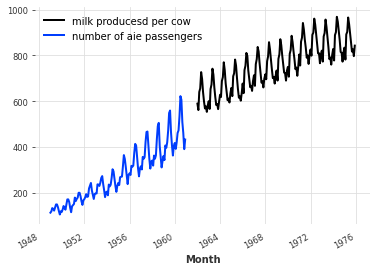

In [39]:
series_milk=MonthlyMilkDataset().load()
series_air=AirPassengersDataset().load()

series_milk.plot(label="milk producesd per cow")
series_air.plot(label="number of aie passengers")
plt.legend() 

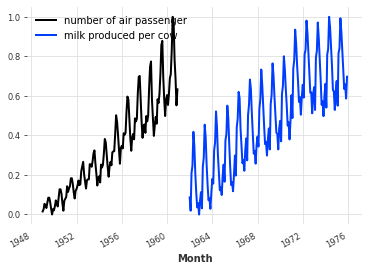

In [42]:
from darts.dataprocessing.transformers import Scaler
scaler_air,scaler_milk=Scaler(),Scaler()

series_air_scaled=scaler_air.fit_transform(series_air)
series_milk_scaled=scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label="number of air passenger")

series_milk_scaled.plot(label="milk produced per cow")
plt.legend()

In [43]:
# for train and validation
train_air,val_air=series_air_scaled[:-36],series_air_scaled[-36:]

train_milk,val_milk=series_milk_scaled[:-36],series_milk_scaled[-36:]

In [44]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries,linear_timeseries,sine_timeseries
from darts.models import RNNModel,TCNModel,TransformerModel,NBEATSModel,BlockRNNModel
from darts.metrics import mape,smape

In [45]:
model_air_milk=NBEATSModel(input_chunk_length=24,output_chunk_length=12,n_epochs=100,random_state=0)

In [46]:
model_air_milk.fit([train_air,train_milk],verbose=True)

[2021-09-26 14:23:10,385] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-26 14:23:10,385] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-26 14:23:10,480] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-26 14:23:10,480] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:01<03:16,  1.98s/it]

 11%|█         | 11/100 [00:21<02:54,  1.96s/it]

 21%|██        | 21/100 [00:44<03:40,  2.79s/it]

 31%|███       | 31/100 [01:21<04:07,  3.59s/it]

 41%|████      | 41/100 [01:56<03:32,  3.60s/it]

 51%|█████     | 51/100 [02:31<02:48,  3.43s/it]

 61%|██████    | 61/100 [03:01<01:36,  2.47s/it]

 71%|███████   | 71/100 [03:21<00:56,  1.96s/it]

 81%|████████  | 81/100 [03:41<00:37,  1.95s/it]

 91%|█████████ | 91/100 [04:00<00:18,  2.03s/it]

100%|██████████| 100/100 [04:21<00:00,  2.62s/it]


MAPE=5.51%


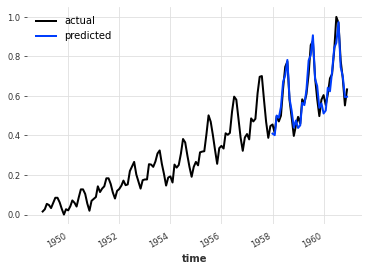

In [50]:
pred=model_air_milk.predict(n=36,series=train_air)
series_air_scaled.plot(label="actual")
pred.plot(label="predicted")
plt.legend();
print('MAPE={:.2f}%'.format(mape(series_air_scaled,pred)))

MAPE=11.75%


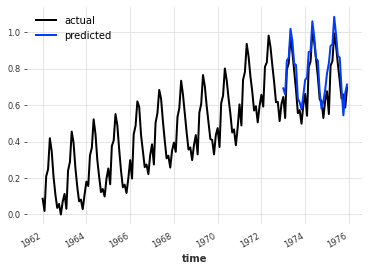

In [52]:
pred=model_air_milk.predict(n=36,series=train_milk)
series_milk_scaled.plot(label="actual")
pred.plot(label="predicted")
plt.legend();
print('MAPE={:.2f}%'.format(mape(series_milk_scaled,pred)))